# SETUP

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
from keras.models import load_model
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import tensorflow_datasets as tfds

tf.keras.backend.set_floatx("float64")

GPU device not found
Found GPU at: 


# Dataset Loading

This cell instantiates a data loader class, which is used for handling the dataset. A preproccesed image and segmentation dataset is loaded with the specified configurations.

In [54]:
dataset = "birds"
test_size=300
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()
cardinality = int(img_ds.cardinality())

img_test = img_ds.take(test_size)
seg_test = seg_ds.take(test_size)
img_train = img_ds.skip(test_size)
seg_train = seg_ds.skip(test_size)    

# Activation Functions

These are possible activation functions that could be used. I couldn't get them working properly but they can be used to regularise the input if implemented correctly.

In [55]:
def scaledtanh(x): 
    return tf.math.tanh(x*0.1)

def scaledatanh(x):
    return tf.math.atanh(x)*10

# Image PCWN Training
This cell trains a PCWN for the image dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/birds_img
out.shape (1, 8, 8, 65)
array([[[0.29

array([[[0.29960293, 0.11921076, 0.06038723],
        [0.28207722, 0.11737132, 0.06246937],
        [0.30297446, 0.11667863, 0.04733456],
        ...,
        [0.19941717, 0.25077456, 0.21736127],
        [0.31082404, 0.33101401, 0.3174642 ],
        [0.42582482, 0.4211244 , 0.40500799]],

       [[0.30291057, 0.12895221, 0.06798407],
        [0.29616126, 0.1175506 , 0.04527731],
        [0.34139097, 0.13974658, 0.05553002],
        ...,
        [0.20699535, 0.23916447, 0.23233762],
        [0.28606626, 0.29170352, 0.2459712 ],
        [0.39355803, 0.37084866, 0.34709308]],

       [[0.30239305, 0.12199157, 0.05394359],
        [0.31584999, 0.11391458, 0.0458386 ],
        [0.36407855, 0.15758128, 0.07504524],
        ...,
        [0.17867145, 0.19000939, 0.16267952],
        [0.25718924, 0.23089242, 0.20463844],
        [0.32900751, 0.29941192, 0.28231633]],

       ...,

       [[0.75725174, 0.54193312, 0.40899801],
        [0.78412461, 0.54535055, 0.4224571 ],
        [0.78858763, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  22.72735495322337
ncc =  [[1.         0.97903807]
 [0.97903807 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.06581217 0.17199205 0.26870573 0.276512  ]
 [0.10309437 0.08741742 0.18240368 0.25291774]
 [0.14986214 0.11783686 0.11250933 0.21013375]
 [0.15522821 0.14229833 0.12775376 0.09111401]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.2174132  0.22428543 0.266647   0.31427983]
 [0.19148537 0.20753053 0.24397618 0.28354388]
 [0.17660443 0.18164321 0.19741836 0.24514996]
 [0.18197529 0.1779352  0.18451049 0.2141497 ]], shape=(4, 4), dtype=float64)


(22.72735495322337,
 array([[1.        , 0.97903807],
        [0.97903807, 1.        ]]))

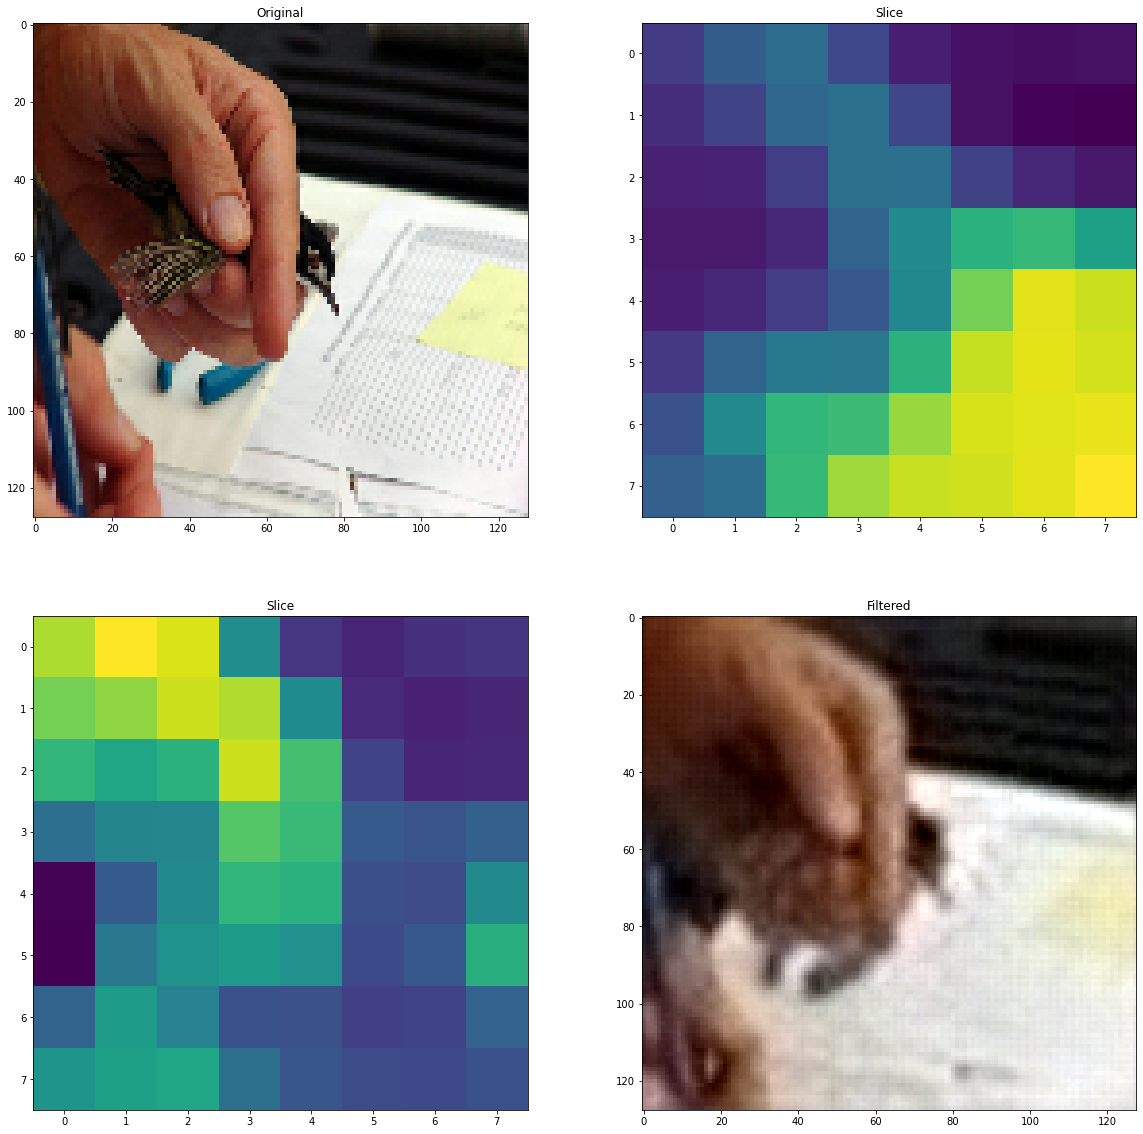

In [56]:
model_name = "img"
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
#imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_test)

# Segmentation PCWN Training
This cell trains a PCWN for the segmentation dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
sample.shape (128, 128, 3)
after reshape: sample.shape (1, 128, 128, 3)
loading from: models/birds_seg
out.shape (1, 8, 8, 65)
array([[[0.33

array([[[0.33939952, 0.36997551, 0.22142215],
        [0.31268337, 0.35923189, 0.20764878],
        [0.32012868, 0.36014092, 0.21464461],
        ...,
        [0.39210948, 0.39861846, 0.36057273],
        [0.38114804, 0.3885929 , 0.34505782],
        [0.36626503, 0.3701866 , 0.34665719]],

       [[0.32044512, 0.36619705, 0.21535981],
        [0.31390932, 0.3581495 , 0.20704561],
        [0.31949633, 0.36190927, 0.20721938],
        ...,
        [0.41873038, 0.41776961, 0.3948051 ],
        [0.39041102, 0.39194337, 0.36767626],
        [0.37916669, 0.38308826, 0.35955885]],

       [[0.30983171, 0.35511357, 0.20254003],
        [0.31509554, 0.36105144, 0.19369973],
        [0.31159717, 0.36019406, 0.21349667],
        ...,
        [0.43372348, 0.43372348, 0.39731014],
        [0.40474877, 0.40585172, 0.38311026],
        [0.37914991, 0.38307148, 0.35954207]],

       ...,

       [[0.45534477, 0.53766996, 0.28544733],
        [0.33828557, 0.43825492, 0.18335296],
        [0.28948137, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  28.182607929145643
ncc =  [[1.         0.97300612]
 [0.97300612 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.3523289  0.35590294 0.35900736 0.35484117]
 [0.34633407 0.36437559 0.34960842 0.35294119]
 [0.36152968 0.36094755 0.35413605 0.34674242]
 [0.36421424 0.34512821 0.35696521 0.34776399]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.35774173 0.34793137 0.36649899 0.36495457]
 [0.3525879  0.34646494 0.35497164 0.35108559]
 [0.36637655 0.36141389 0.36771928 0.36877537]
 [0.36412186 0.36549791 0.37210034 0.35866308]], shape=(4, 4), dtype=float64)


(28.182607929145643,
 array([[1.        , 0.97300612],
        [0.97300612, 1.        ]]))

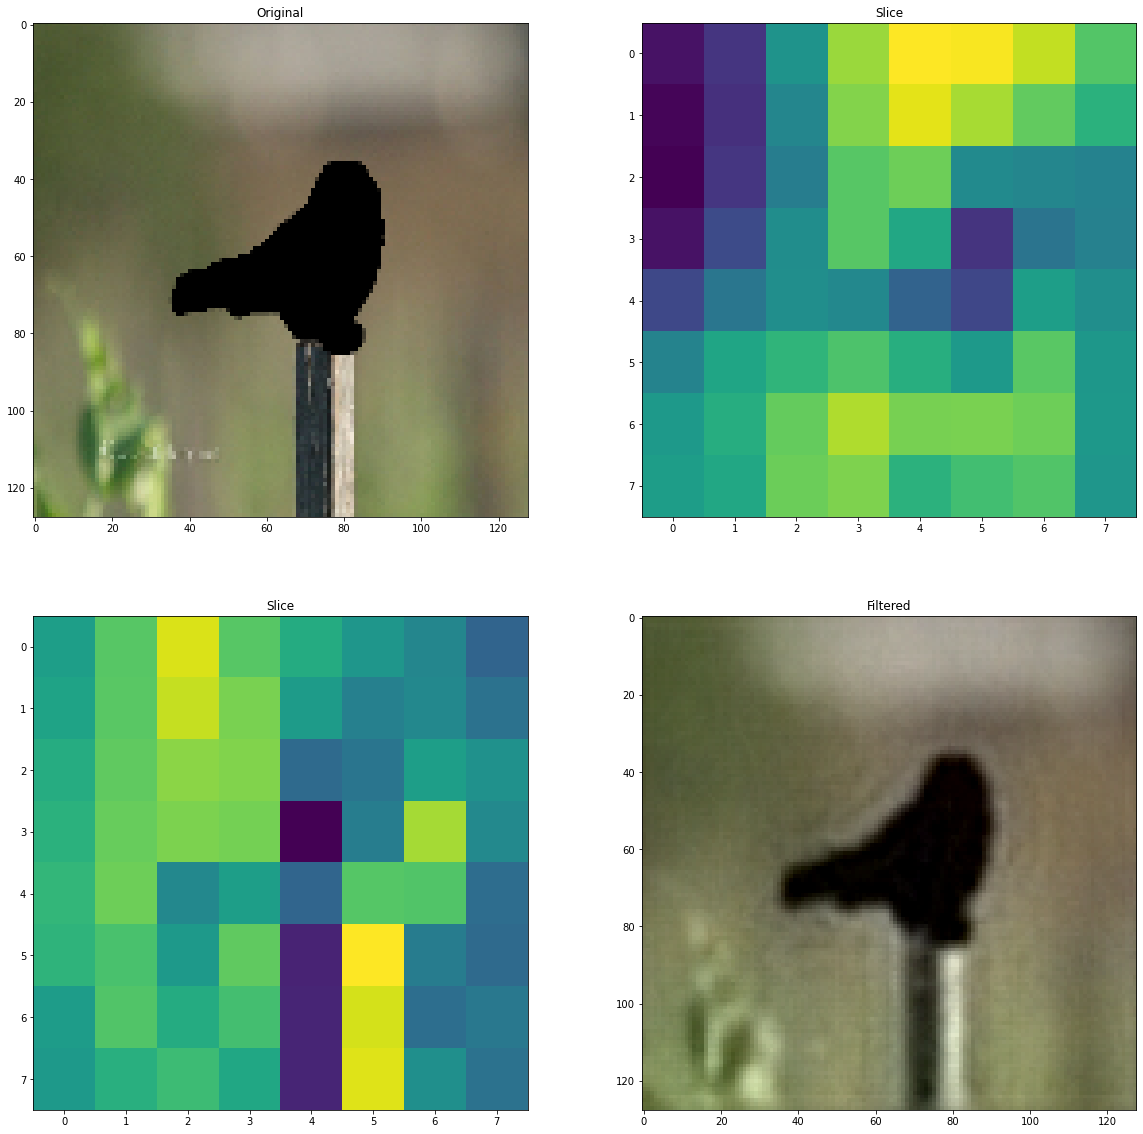

In [57]:
model_name = "seg"
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
#seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()
seg_broker.check_build(seghead,seginvhead,seg_test)

# Linear Least Squares Training (Convolutional)

The following cells are used to find a matrix A and vector b which are used to map the image decomposition onto a segmentation decomposition.

In [58]:
shape = imghead(next(iter(img_train))[0]).shape #Records the image decompositon shape

In [59]:

shape_0 = shape[3] #this is the channels of the decomposition
shape_1 = shape[1]*shape[2] #this is the height*width of the decompostion
shape_2 = shape[1] #this is the height of the decomposition

In [60]:
reconstruct = next(iter(seg_train))[0].shape #the shape that the segmentation will take

In [61]:
n = 0.0

xxt = np.zeros([shape_0,shape_0]) #Initialsed matrix used to find eigen
yxt = np.zeros([shape_0,shape_0]) #Initialsed covariance matrix between image decomposition and segmentation decomposition
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(seg_train.cardinality()))

for item in iter(zip(img_train,seg_train)):
    bar.update(1)
    image = item[0][0]
    segmentation = item[1][0]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/5733 [00:00<?, ?it/s]

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [62]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [63]:
inverse_xxt = tf.linalg.pinv(xxt)

In [64]:
A = tf.matmul(inverse_xxt,yxt)

In [65]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [66]:
A_filter = tf.reshape(A,(1,1,shape_0,shape_0)) 

In [67]:
def iou_coef(y_true, y_pred,smooth=1):
  intersection = tf.reduce_sum(y_true * y_pred, 0)
  union = tf.reduce_sum(y_true,0)+tf.reduce_sum(y_pred,0)-intersection
  iou = tf.reduce_mean((intersection+1) / (union+1), 0)
  return float(iou)

In [68]:
def dice_coef(y_true, y_pred,smooth=1):
    y_true_f = tf.reshape(y_true,-1)
    y_pred_f =tf.reshape(y_pred,-1)
    intersection = tf.reduce_sum(y_true_f * y_pred_f,0)

    return float((2. * intersection+smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)+smooth))

0.0003819709702062643
0.5477513135468297


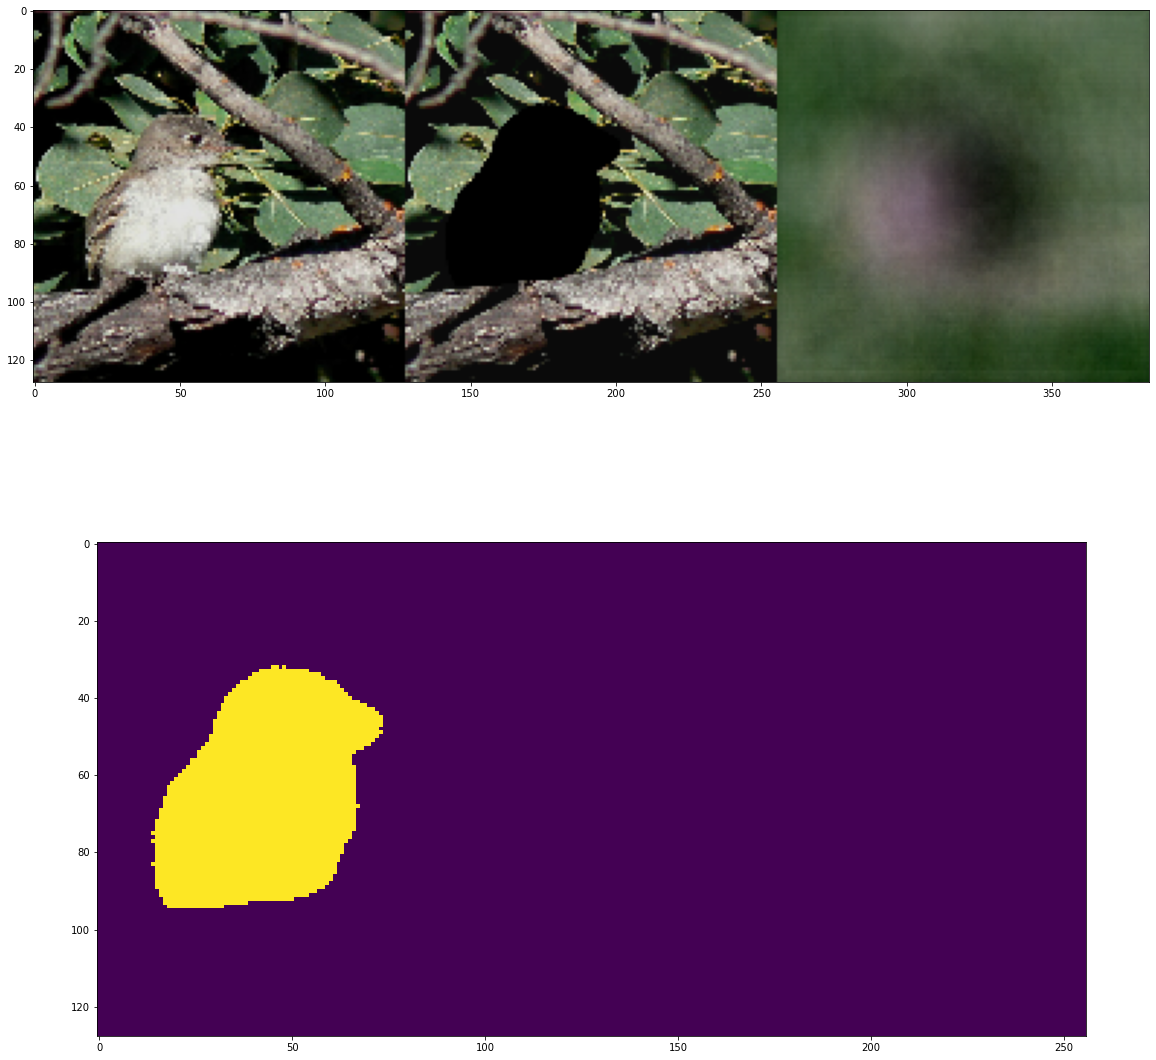

In [71]:
threshold_intensity = 0.03
skip = np.random.randint(0,70)
image,seg_base = next(iter(zip(img_train.skip(skip),seg_train.skip(skip))))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

y_true = tf.cast(tf.reduce_mean(seg_base[0],2)==0,tf.float64)
y_pred = tf.cast(tf.reduce_mean(seg[0],2)<threshold_intensity,tf.float64)

print(dice_coef(y_true,y_pred))
print(iou_coef(y_true,y_pred))
plt.subplot(2,1,1)
plt.imshow(np.hstack([image[0],seg_base[0],seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([y_true,y_pred]))

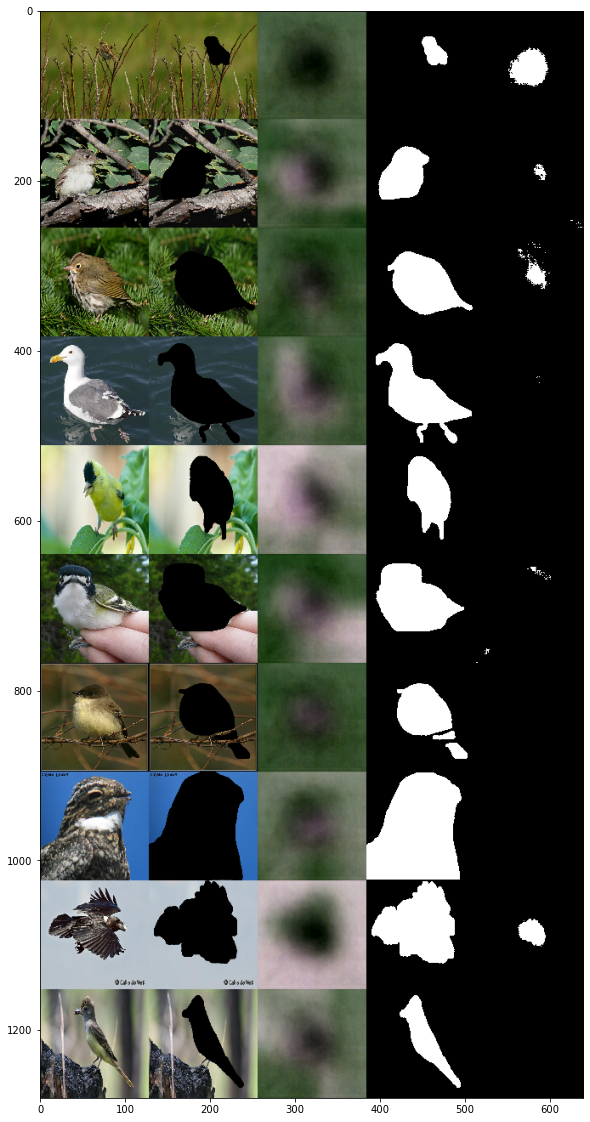

In [70]:
stacked_decom = []
for image,seg_base in iter(zip(img_train.take(10),seg_train.take(10))):
    imgdecom = imghead(image[0])
    conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
    conv = tf.nn.bias_add(conv,b)
    seg = seginvhead(conv)
    y_true = tf.cast(tf.reduce_mean(seg_base[0],2)==0,tf.float64)
    y_pred = tf.cast(tf.reduce_mean(seg[0],2)<=threshold_intensity,tf.float64)
    stacked_decom.append(np.hstack([image[0],seg_base[0],seg[0],np.repeat(y_true,3).reshape(image[0].shape),np.repeat(y_pred,3).reshape(image[0].shape)]))
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(np.vstack(stacked_decom))

In [27]:
for split in ["train","test"]:
    if split == "train":
        img_ds, seg_ds = (img_train,seg_train)
    else:
        img_ds, seg_ds = (img_test,seg_test)
    n = int(seg_ds.cardinality())
    dice_coeff_vals = []
    for image,seg_base in iter(zip(img_ds, seg_ds)):
        imgdecom = imghead(image[0])
        conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
        conv = tf.nn.bias_add(conv,b)
        seg = seginvhead(conv)
        y_true = tf.cast(tf.reduce_mean(seg_base[0],2)==0,tf.float64)
        y_pred = tf.cast(tf.reduce_mean(seg[0],2)<threshold_intensity,tf.float64)
        dice_coeff_vals.append(dice_coef(y_true,y_pred))
    dice_coeff_mean = sum(dice_coeff_vals)/n
    dice_coeff_std = (sum([((x - dice_coeff_mean) ** 2) for x in dice_coeff_vals]) / n)**0.5
    np.save(f"PCWN_CONV_{dataset}_{split}",dice_coeff_vals)